# 1. Introduction to Neural Networks

**Hello everyone!** 

Imagine you have lots of little helpers (called "neurons") who pass simple messages (numbers) to each other. Together, they can learn to solve problems—just like a team figuring out puzzles. This is what a **Neural Network** does!

In this notebook, we will explore:
1. What neurons are.
2. How they connect into layers.
3. How they learn through something called **gradient descent** and **backpropagation**.
4. How to build a simple neural network in Python to recognise flower types (using the Iris dataset as an example).

We will keep things as simple as possible.

### Neurons: The Little Helpers

**Think of a neuron like a small box** that waits for numbers (information) to come in. 
It does a tiny calculation (like adding or multiplying) and then passes the result along to another neuron.

- Each neuron has weights (like small switches) and a bias (a little push).
- When numbers come in, they get multiplied by weights, added together, and then the bias is added. 
- The result might get squashed with a function (called the activation function), then sent to the next neuron.

This is how one neuron works. A neural network has many such neurons, arranged in **layers**.

### Layers: Stacks of Neurons

**A layer is a group of neurons** side-by-side, each doing its tiny calculation. 
- The first layer receives the original input (like a picture or some numbers about flowers).
- The middle layers are called **hidden layers** (because we usually don't see what they do directly).
- The final layer makes a **prediction**—like, "This flower is setosa," or "This flower is versicolor," etc.

Sometimes, many layers in a network are called **deep** learning (because it's deep with lots of layers).


# Gradient Descent and Backpropagation: How Neurons Learn

**Gradient Descent**:
- Imagine you are on a hill in the fog and want to get to the bottom (the best solution).
- You can't see far, so you take small steps downhill (the direction where the ground slopes down the most).
- Eventually, step by step, you get to the lowest point you can find.

**Backpropagation**:
- It's like checking how each little step affects the total error (like how far you are from the goal at the bottom).
- If a neuron didn't do its job well, we adjust its weights and bias.
- We do this backwards, layer by layer, so each neuron learns how to do better next time.

This is repeated many times until the network is good at guessing or predicting.

In [1]:
# We will use a small flower dataset (the famous Iris dataset).
# It has measurements of petals and sepals, and the type of flower (3 species).

# numpy helps with math on big lists of numbers.
import numpy as np #

# pandas is for reading and handling data tables.
import pandas as pd #

# matplotlib and seaborn help us draw pictures of our data.
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow/Keras will build and train our neural network.
# For our neural network, we'll use TensorFlow / Keras (a simple library for neural networks).
from tensorflow import keras
from tensorflow.keras import layers

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Don't worry about this piece of code, it is to make sure that the dataset is installed correctly
# If you get an error in the following cell, run this cell, restart the kernel and then run the following cell again
import certifi
import os

os.environ["SSL_CERT_FILE"] = certifi.where()

In [3]:
# Load Iris data directly from seaborn for simplicity
iris_data = sns.load_dataset("iris")

# The Iris dataset has 150 flowers with columns: sepal_length, sepal_width, petal_length, petal_width, and species.
# The species can be one of three types: setosa, versicolor, or virginica.

# Let's see the first few rows
print(iris_data.head())

# Check how many rows and columns
print("\nDataset shape:", iris_data.shape)

# Check what species we have
print("\nSpecies distribution:")
print(iris_data["species"].value_counts())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Dataset shape: (150, 5)

Species distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [4]:
# We need to separate the "input" (measurements) from the "output" (species).
X = iris_data.drop("species", axis=1)  # All columns except 'species'
y = iris_data["species"]  # Just the 'species' column

# For the output (y), we need to turn the species names into numbers.
# Keras can handle this with "one-hot encoding", but let's do it manually with pandas "get_dummies".
y_encoded = pd.get_dummies(y)

# Now, X contains the measurements (4 columns).
# y_encoded contains something like:
#   setosa  versicolor  virginica
# 0    1        0         0
# 1    1        0         0
# ... and so on
print("Encoded species (first few rows):")
print(y_encoded.head())

"""
Neural networks want numbers. So we convert the species into columns of 0/1 (one-hot encoding).

For example, if a flower is setosa, it might be represented as [1, 0, 0].
"""

Encoded species (first few rows):
   setosa  versicolor  virginica
0    True       False      False
1    True       False      False
2    True       False      False
3    True       False      False
4    True       False      False


'\nNeural networks want numbers. So we convert the species into columns of 0/1 (one-hot encoding).\n\nFor example, if a flower is setosa, it might be represented as [1, 0, 0].\n'

In [5]:
from sklearn.model_selection import train_test_split

# Split our data into training set (to learn) and test set (to check if it learned well).
# We'll use 80% for training, 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (120, 4)
Test set size: (30, 4)


In [6]:
# We'll make a small network:
# Input layer -> Hidden layer -> Output layer.

model = keras.Sequential(
    [
        layers.Dense(
            8, activation="relu", input_shape=(4,)
        ),  # 4 inputs (4 measurements), 8 neurons
        layers.Dense(8, activation="relu"),  # Another hidden layer with 8 neurons
        layers.Dense(
            3, activation="softmax"
        ),  # 3 outputs (setosa, versicolor, virginica)
    ]
)

# Compile the model:
# - loss='categorical_crossentropy' because we have more than two categories
# - optimizer='adam' is a popular version of gradient descent
# - metrics=['accuracy'] to track how many we get right
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print("Neural network created and compiled!")
model.summary()  # Let's see what our model looks like

Neural network created and compiled!


/Users/scsoc/Library/Python/3.12/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139 (556.00 B)

 Trainable params: 139 (556.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Let's train for some epochs (think of 1 epoch as seeing all training data once).
# We'll keep it small, e.g., 50 epochs, so it runs quickly.

history = model.fit(
    X_train,  # our inputs for training
    y_train,  # our one-hot encoded output labels
    epochs=50,  # how many times to see all data
    batch_size=8,  # how many samples to process before updating weights
    validation_split=0.2,  # split part of the training set for validation
    verbose=0,  # set to 1 if you want to see the progress bar
)

# Let's look at final accuracy on the test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", test_acc)

Test accuracy: 0.6000000238418579


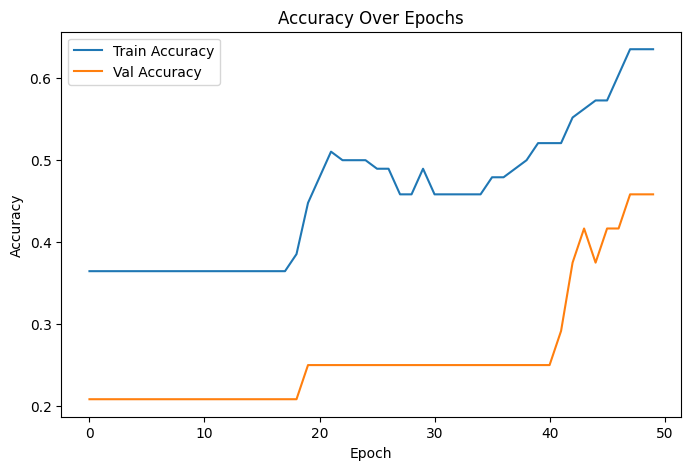

In [8]:
# Let's plot the training and validation accuracy over epochs.
plt.figure(figsize=(8, 5))
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Recap and Next Steps

**Great job!** We've built a small neural network to classify flowers in the Iris dataset. 
We learned:
- How neurons are like little helpers that perform small calculations.
- How layers stack these neurons.
- How networks learn by taking small steps down the "hill" (gradient descent).
- How "backpropagation" helps each neuron fix its mistakes.

**What next?**
- Try adding more layers to see if accuracy changes.
- Try changing the activation function to see what happens.
- Use a different dataset (e.g., digits or something else).

### Simple (Child-Like) Summary

1. **Neuron**: A tiny friend who reads numbers, does a small sum, and sends out a number.
2. **Layer**: A bunch of friends (neurons) side by side.
3. **Network**: Lots of layers stacked to solve a problem together.
4. **Gradient Descent**: Tiny steps to find the best path (like going downhill).
5. **Backpropagation**: Checking who made mistakes and fixing them from the end back to the start.

This is how a neural network learns!

### Using Generative AI for Neural Network Experiments

If you get stuck or want to **try different approaches**, you can use prompt engineering with a tool like ChatGPT. 

Example prompt:
"Please show me how to build a deeper neural network in Keras for the Iris dataset, with 3 hidden layers. Use 'relu' activation and show me how to evaluate with accuracy and confusion matrix. Provide code in a Jupyter Notebook format."

By giving **specific instructions**, you often get detailed code you can copy, run, and learn from. Happy experimenting!

# 2. MNIST Digit Classification with a Neural Network

This part of the notebook demonstrates how to:
1. Load the MNIST dataset (images of handwritten digits).
2. Prepare (reshape and normalise) the data.
3. Build a basic Neural Network using TensorFlow/Keras.
4. Train the model and evaluate its performance.
5. Visualise predictions and errors.

Let's get started!

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix, classification_report

print("Libraries imported successfully!")

Libraries imported successfully!


In [10]:
# The MNIST dataset is provided within Keras, so it's easy to load.
# It has 60,000 training images and 10,000 testing images, each of a handwritten digit from 0 to 9.

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training set shape (images):", X_train.shape)
print("Training set shape (labels):", y_train.shape)
print("Test set shape (images):", X_test.shape)
print("Test set shape (labels):", y_test.shape)

"""
Each image is 28×28 pixels in grey scale.
Labels range from 0 to 9, indicating which digit is pictured.
"""

Training set shape (images): (60000, 28, 28)
Training set shape (labels): (60000,)
Test set shape (images): (10000, 28, 28)
Test set shape (labels): (10000,)


'\nEach image is 28×28 pixels in grey scale.\nLabels range from 0 to 9, indicating which digit is pictured.\n'

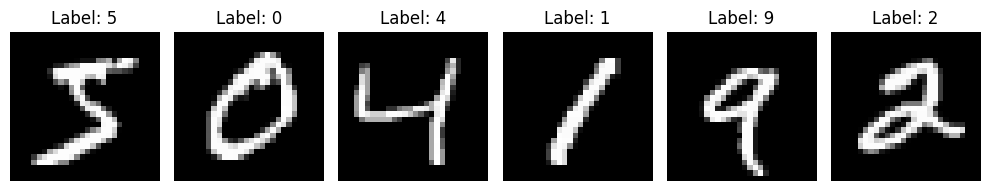

'\nWe display a few images from the training set.\nThe true label is shown in each subplot’s title.\n'

In [11]:
# Let's look at a few sample images to get an idea of what digits look like
plt.figure(figsize=(10, 4))

for i in range(6):
    plt.subplot(1, 6, i + 1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

"""
We display a few images from the training set.
The true label is shown in each subplot’s title.
"""

In [12]:
# 1. Reshape the images
#    Currently, X_train has shape (60000, 28, 28).
#    Many neural networks expect a flat array (784 = 28*28) for each image
#    if we are building a simple Dense-based network.

#    Alternatively, for a CNN, we'd keep the shape as (28,28,1).
#    For a simple fully-connected network, we flatten it.
X_train_flat = X_train.reshape(60000, 28 * 28)
X_test_flat = X_test.reshape(10000, 28 * 28)

# 2. Convert the pixel values from 0-255 to float32 and normalise to 0-1
X_train_flat = X_train_flat.astype("float32") / 255.0
X_test_flat = X_test_flat.astype("float32") / 255.0

# 3. Convert labels (0-9) to one-hot encoding
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

print("Data reshaped and normalised.")
print("Label data one-hot encoded.")

"""
Reshape: We flatten each image into a 1D vector of length 784.
Normalisation: We scale pixel intensities from [0, 255] to [0, 1] for faster and more stable training.
One-hot encoding: Each label (e.g., 7) becomes [0,0,0,0,0,0,0,1,0,0].
"""

Data reshaped and normalised.
Label data one-hot encoded.


'\nReshape: We flatten each image into a 1D vector of length 784.\nNormalisation: We scale pixel intensities from [0, 255] to [0, 1] for faster and more stable training.\nOne-hot encoding: Each label (e.g., 7) becomes [0,0,0,0,0,0,0,1,0,0].\n'

In [13]:
# We will create a simple feed-forward network:
#  - Input layer: 784 inputs (flattened pixels)
#  - Hidden layer: 128 neurons, ReLU activation
#  - Output layer: 10 neurons, softmax activation

model = Sequential(
    [
        Dense(128, activation="relu", input_shape=(784,)),  # hidden layer
        Dense(10, activation="softmax"),  # output layer
    ]
)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()  # Show the model structure

"""
Dense(128): A layer of 128 fully connected neurons, each receiving input from all 784 pixels.

ReLU: A common activation function (Rectified Linear Unit).

Dense(10, softmax): Outputs a probability distribution across 10 classes (digits 0–9).
Compile
    loss: 'categorical_crossentropy' for multi-class classification.
    optimizer: 'adam', a widely used optimiser that employs gradient descent methods.
    metrics: 'accuracy' to gauge correct predictions.
"""

/Users/scsoc/Library/Python/3.12/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

"\nDense(128): A layer of 128 fully connected neurons, each receiving input from all 784 pixels.\n\nReLU: A common activation function (Rectified Linear Unit).\n\nDense(10, softmax): Outputs a probability distribution across 10 classes (digits 0–9).\nCompile\n    loss: 'categorical_crossentropy' for multi-class classification.\n    optimizer: 'adam', a widely used optimiser that employs gradient descent methods.\n    metrics: 'accuracy' to gauge correct predictions.\n"

In [14]:
# Train the network on the training data, validating on a portion of it (validation_split=0.1).
history = model.fit(
    X_train_flat,
    y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=1,
)

print("Model training complete!")

"""
epochs=10: The entire training set is shown to the network 10 times.
batch_size=128: The network updates weights after every 128 samples.
validation_split=0.1: 10% of the training data is held out (not used for training) so we can monitor the model’s performance as it trains.
"""

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8134 - loss: 0.6700 - val_accuracy: 0.9612 - val_loss: 0.1577
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - accuracy: 0.9496 - loss: 0.1775 - val_accuracy: 0.9690 - val_loss: 0.1107
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.9665 - loss: 0.1202 - val_accuracy: 0.9732 - val_loss: 0.0951
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9731 - loss: 0.0918 - val_accuracy: 0.9745 - val_loss: 0.0862
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - accuracy: 0.9796 - loss: 0.0712 - val_accuracy: 0.9783 - val_loss: 0.0780
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - accuracy: 0.9824 - loss: 0.0604 - val_accuracy: 0.9780 - val_loss: 0.0728
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - accuracy: 0.9859 - loss: 0.0499 - val_accuracy: 0.9783 - val_loss: 0.0729
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - accuracy: 0.9894 - loss: 0.0405 - val_

'\nepochs=10: The entire training set is shown to the network 10 times.\nbatch_size=128: The network updates weights after every 128 samples.\nvalidation_split=0.1: 10% of the training data is held out (not used for training) so we can monitor the model’s performance as it trains.\n'

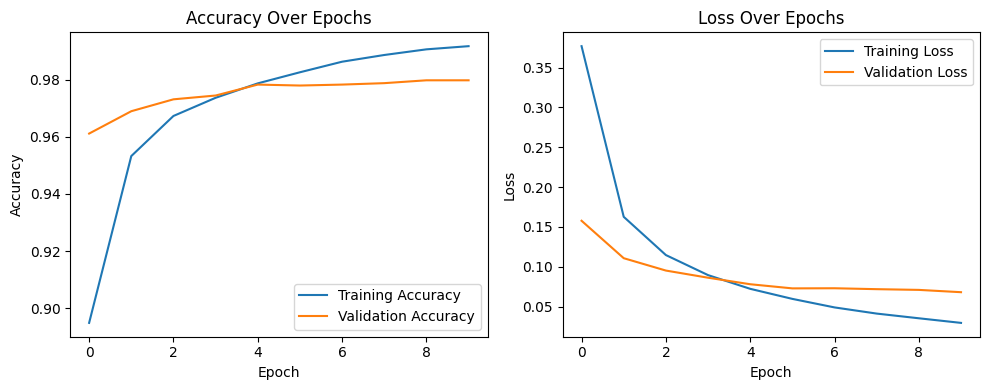

'\nWe track accuracy (which should go up) and loss (which should go down) as we train.\nIf validation metrics diverge, it might indicate overfitting.\n'

In [15]:
# Plot training vs validation accuracy over epochs to see if our model is learning well.
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

"""
We track accuracy (which should go up) and loss (which should go down) as we train.
If validation metrics diverge, it might indicate overfitting.
"""

In [16]:
test_loss, test_accuracy = model.evaluate(X_test_flat, y_test_cat, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

"""
The test data was not used during training.
Test accuracy is a good indicator of how well the model recognises digits it has never seen.
"""

Test Loss: 0.0700
Test Accuracy: 0.9780


'\nThe test data was not used during training.\nTest accuracy is a good indicator of how well the model recognises digits it has never seen.\n'

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step


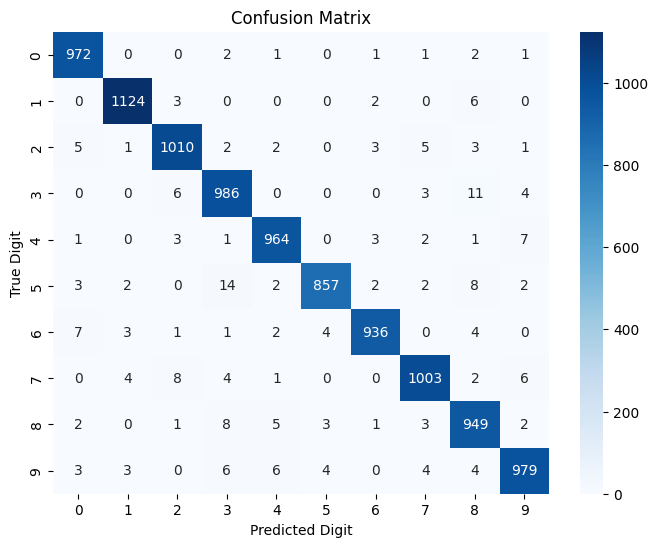

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.96      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.96      0.97      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



'\n- predict: The network returns probabilities for each class.\n- argmax picks the class (0–9) with the highest probability for each image.\n- confusion_matrix: Diagonal elements show correct predictions; off-diagonal elements show misclassifications.\n- classification_report: Summarises precision, recall, and F1-score for each digit class.\n'

In [17]:
# We can see which digits are often confused with others using a confusion matrix.

# 1. Predict classes on the test set
y_pred_probs = model.predict(X_test_flat)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# 2. Build the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# 3. Visualise the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Digit")
plt.ylabel("True Digit")
plt.title("Confusion Matrix")
plt.show()

# 4. Print classification report (precision, recall, etc.)
print(classification_report(y_test, y_pred_classes))

"""
- predict: The network returns probabilities for each class.
- argmax picks the class (0–9) with the highest probability for each image.
- confusion_matrix: Diagonal elements show correct predictions; off-diagonal elements show misclassifications.
- classification_report: Summarises precision, recall, and F1-score for each digit class.
"""

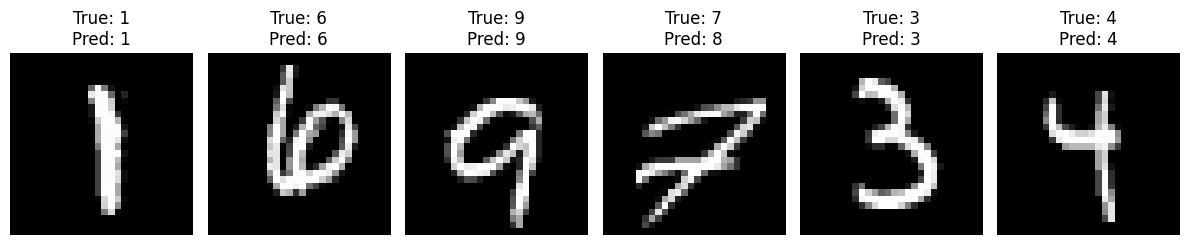

In [18]:
# Let's randomly pick a few test images and see how the model performs.
# We will display the model's predicted digit vs. the true digit.
# A small visual sanity check to confirm if the predicted label matches the actual digit.

indices = np.random.choice(len(X_test_flat), 6, replace=False)

plt.figure(figsize=(12, 4))
for i, idx in enumerate(indices):
    img = X_test[idx]
    true_label = y_test[idx]
    pred_label = y_pred_classes[idx]

    plt.subplot(1, 6, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis("off")

plt.tight_layout()
plt.show()

### Conclusions and Next Steps

**Congratulations!** You have successfully:
1. Loaded the MNIST dataset.
2. Built a simple neural network with a single hidden layer.
3. Trained the network to recognise digits.
4. Evaluated your model using a confusion matrix and classification metrics.

### Next Steps
- Increase the number of hidden layers or neurons to see if it improves accuracy.
- Use Convolutional Neural Networks (CNNs), which are particularly good at image recognition.
- Experiment with different optimisers (e.g., SGD, RMSProp) or different activation functions (e.g., sigmoid).

Enjoy exploring deeper neural network techniques and other exciting datasets!

Image size (original): (280, 262)


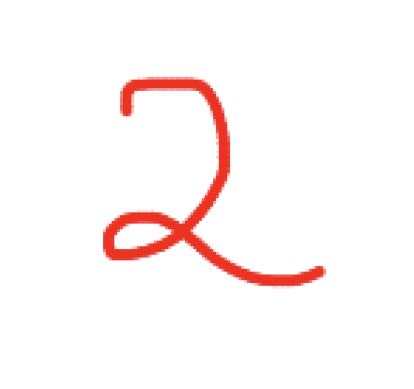

In [19]:
# Take an image and predict the digit (scale down to correct size)
from PIL import Image

# Load an image file (you can also use your own)
img = Image.open("test_2.png")

# Show the image
plt.imshow(img, cmap="gray")
plt.axis("off")

# Print the image size
print("Image size (original):", img.size)

(-0.5, 279.5, 261.5, -0.5)

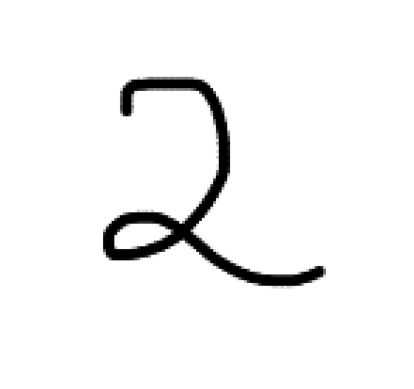

In [20]:
# Convert to grayscale
img = img.convert("L")
plt.imshow(img, cmap="gray")
plt.axis("off")

(-0.5, 27.5, 27.5, -0.5)

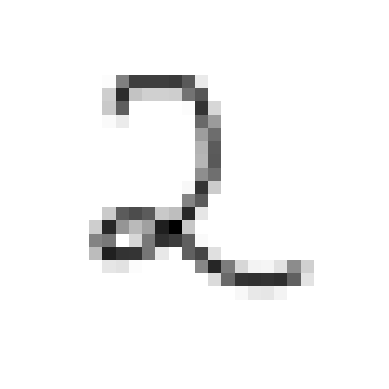

In [21]:
# Resize (the neural network has specific input size requirements)
# The MNIST dataset images are 28x28 pixels.
# We'll use the "ANTIALIAS" filter to preserve image quality.
img = img.resize((28, 28))

# Draw the image
plt.imshow(img, cmap="gray")
plt.axis("off")

(-0.5, 27.5, 27.5, -0.5)

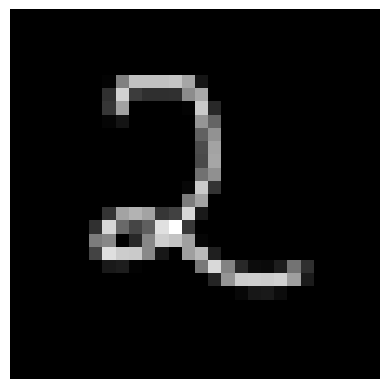

In [22]:
# Convert to numpy array
img_array = np.array(img)

# Invert the pixel values (MNIST dataset has white digits on black background)
img_array = 255 - img_array

# Normalize the pixel values (0-255 -> 0-1)
img_array = img_array.astype("float32") / 255.0

# Draw the image
plt.imshow(img_array, cmap="gray")
plt.axis("off")

In [23]:
# Flatten the image to a 1D array
img_array = img_array.reshape(1, 28 * 28)

# Now, we can use the model to predict the digit
pred_probs = model.predict(img_array)

print("Predicted probabilities:", pred_probs)

# Get the predicted class
pred_class = np.argmax(pred_probs)

print("Predicted class:", pred_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted probabilities: [[6.1841606e-04 3.3903107e-02 8.7045753e-01 1.7108373e-02 1.9754168e-02
  8.4252218e-03 9.0881726e-03 1.1840423e-02 2.7402336e-02 1.4022223e-03]]
Predicted class: 2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


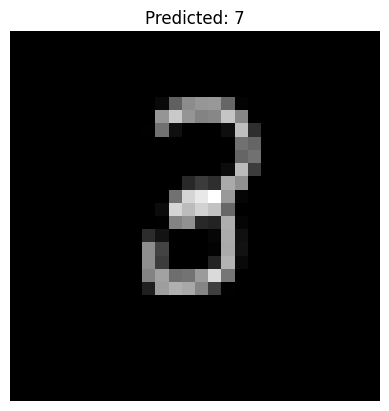

Probability of 0: 0.0105
Probability of 1: 0.1422
Probability of 2: 0.0725
Probability of 3: 0.1132
Probability of 4: 0.0672
Probability of 5: 0.0337
Probability of 6: 0.0373
Probability of 7: 0.3879
Probability of 8: 0.0628
Probability of 9: 0.0726


In [24]:
# Let's make a function to predict the digit from an image file
def predict_digit(image_path):
    # Load the image
    img = Image.open(image_path)

    # Convert to grayscale
    img = img.convert("L")

    # Resize
    img = img.resize((28, 28))

    # Convert to numpy array
    img_array = np.array(img)

    # Invert the pixel values
    img_array = 255 - img_array

    # Normalize
    img_array = img_array.astype("float32") / 255.0

    # Flatten
    try:
        img_array = img_array.reshape(1, 28 * 28)
        pred_probs = model.predict(img_array)
    # This is because we will use the same function later, and the Convolutional Neural Network expects a different shape
    except ValueError:
        img_array = img_array.reshape(1, 28, 28, 1)
        pred_probs = model.predict(img_array)

    # Predict
    pred_class = np.argmax(pred_probs)

    # Visualise the probabilities
    plt.imshow(img_array.reshape(28, 28), cmap="gray")
    plt.axis("off")
    plt.title(f"Predicted: {pred_class}")
    plt.show()

    # Print each probabilty in line with the predicted class
    for i, prob in enumerate(pred_probs[0]):
        print(f"Probability of {i}: {prob:.4f}")

# Test the function
image_path = "test_3.png"
predicted_digit = predict_digit(image_path)

# 3. MNIST Digit Classification with a Simple CNN

This section of the  notebook demonstrates:
1. Loading the MNIST dataset.
2. Preparing data for a Convolutional Neural Network (CNN).
3. Defining and training a CNN with TensorFlow/Keras.
4. Evaluating the model's performance on test data.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# mnist: Quick access to the MNIST dataset through Keras.
from tensorflow.keras.datasets import mnist

# Sequential: A way to build models layer by layer.
from tensorflow.keras.models import Sequential

# Conv2D, MaxPooling2D, Flatten, Dense, Dropout: Layers we'll use to build our CNN.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# to_categorical: Converts labels to a one-hot encoding format (e.g., digit 7 becomes [0,0,0,0,0,0,0,1,0,0]).
from tensorflow.keras.utils import to_categorical

# confusion_matrix and classification_report: Evaluate how well the model performs.
from sklearn.metrics import confusion_matrix, classification_report

print("Libraries imported successfully!")

Libraries imported successfully!


In [26]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training set size:", X_train.shape, y_train.shape)
print("Test set size:", X_test.shape, y_test.shape)

"""
X_train, y_train = images and labels for training (60,000 samples).
X_test, y_test = images and labels for testing (10,000 samples).
Each image is 28 x 28, and each label is an integer from 0 to 9.
"""

Training set size: (60000, 28, 28) (60000,)
Test set size: (10000, 28, 28) (10000,)


'\nX_train, y_train = images and labels for training (60,000 samples).\nX_test, y_test = images and labels for testing (10,000 samples).\nEach image is 28 x 28, and each label is an integer from 0 to 9.\n'

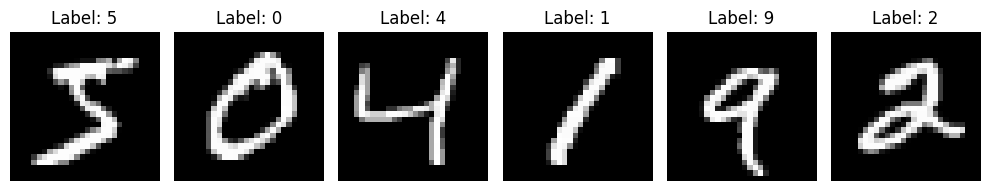

'\nDisplays a few of the handwritten digits and their true labels.\nConfirms we’ve loaded the data correctly.\n'

In [27]:
# Show a few examples
plt.figure(figsize=(10, 4))
for i in range(6):
    plt.subplot(1, 6, i + 1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

"""
Displays a few of the handwritten digits and their true labels.
Confirms we’ve loaded the data correctly.
"""

In [28]:
# 1. Reshape data to fit the CNN input requirements
#    CNNs on grayscale images typically expect shape: (height, width, channels).
#    For MNIST: height=28, width=28, channels=1 (grayscale).

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# 2. Convert from int to float32 and normalise pixel values from 0-255 to 0-1
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# 3. One-hot encode the labels
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

print("Data reshaped to:", X_train.shape, "and normalised.")
print("Labels one-hot encoded to:", y_train_cat.shape)

"""
reshape: (28, 28, 1) indicates 1 colour channel (grayscale).
normalise: Dividing by 255 scales values into [0,1], aiding training.
one-hot encoding: Each label becomes a 10-element vector for the 10 digit classes.
"""

Data reshaped to: (60000, 28, 28, 1) and normalised.
Labels one-hot encoded to: (60000, 10)


'\nreshape: (28, 28, 1) indicates 1 colour channel (grayscale).\nnormalise: Dividing by 255 scales values into [0,1], aiding training.\none-hot encoding: Each label becomes a 10-element vector for the 10 digit classes.\n'

In [29]:
"""
- Conv2D: Learns filters (kernels) that detect specific shapes or edges.
- MaxPooling2D: Reduces the size of each feature map, capturing the most important information.
- Flatten: Turns the 2D (or 3D) features into a single 1D vector to feed into fully connected layers.
- Dense: Standard “fully connected” layers for classification.
- Dropout: Randomly “turns off” some neurons during training to help prevent overfitting.
- softmax: Outputs a probability distribution over the 10 classes.
"""

model = Sequential()

# Convolutional Layer 1:
#  - 32 filters, each 3x3 in size
#  - 'relu' activation function
#  - input shape for the first layer only: (28, 28, 1)
model.add(
    Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1))
)

# Max Pooling Layer:
#  - reduces spatial dimensions, helping to generalise and reduce parameters
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2:
#  - 64 filters, each 3x3 in size
#  - 'relu' activation function
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))

# Another Max Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten: Converts 2D feature maps to a 1D vector
model.add(Flatten())

# Dense (Fully Connected) layer
model.add(Dense(128, activation="relu"))

# Optional Dropout: helps reduce overfitting
model.add(Dropout(0.5))

# Output layer: 10 neurons (for 10 digit classes),
# each with 'softmax' for probabilities
model.add(Dense(10, activation="softmax"))

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

/Users/scsoc/Library/Python/3.12/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# We'll train for 10 epochs, which should be enough to get decent accuracy on MNIST.
# We can always increase this for better performance.

history = model.fit(
    X_train, y_train_cat, batch_size=128, epochs=10, validation_split=0.1, verbose=1
)

print("Training complete!")

"""
- batch_size=128: The network updates weights after seeing 128 images.
- epochs=10: Number of times the model sees the entire training dataset.
- validation_split=0.1: Splits 10% of training data for validation (monitoring overfitting).
"""

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.7917 - loss: 0.6545 - val_accuracy: 0.9835 - val_loss: 0.0588
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9681 - loss: 0.1071 - val_accuracy: 0.9865 - val_loss: 0.0432
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9782 - loss: 0.0742 - val_accuracy: 0.9910 - val_loss: 0.0357
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9840 - loss: 0.0555 - val_accuracy: 0.9895 - val_loss: 0.0356
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9862 - loss: 0.0474 - val_accuracy: 0.9907 - val_loss: 0.0349
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9869 - loss: 0.0436 - val_accuracy: 0.9897 - val_loss: 0.0375
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9874 - loss: 0.0390 - val_accuracy: 0.9908 - val_loss: 0.0300
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9897 - loss: 0.0326 - val_acc

'\n- batch_size=128: The network updates weights after seeing 128 images.\n- epochs=10: Number of times the model sees the entire training dataset.\n- validation_split=0.1: Splits 10% of training data for validation (monitoring overfitting).\n'

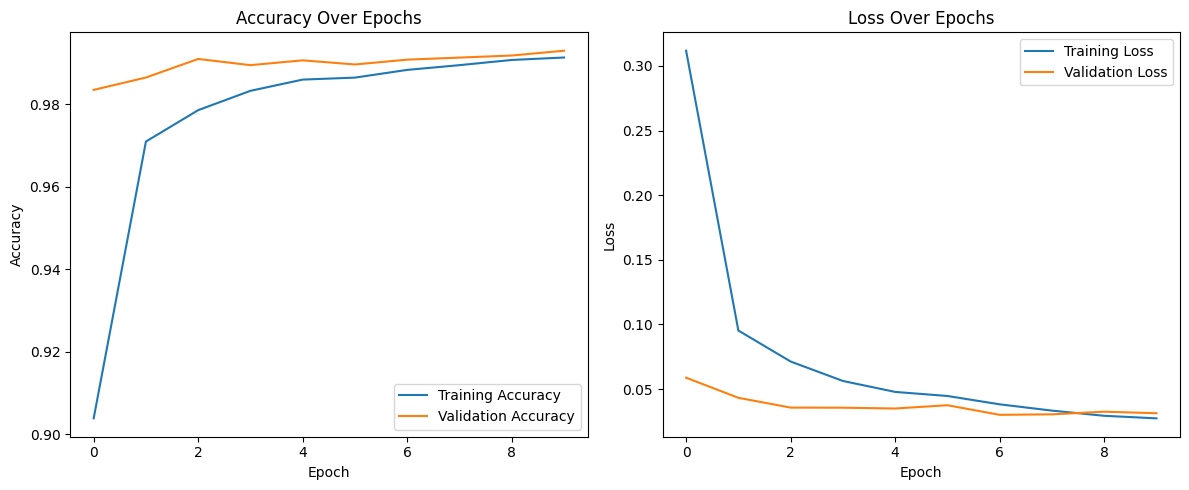

In [31]:
"""
Visualise how accuracy and loss change as the model trains.
Look for signs of overfitting (training accuracy much higher than validation accuracy).
"""

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [32]:
"""
Evaluates performance on images that were not used during training.
MNIST CNNs typically exceed 98% accuracy quite easily.
"""

test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Test Loss: 0.0247
Test Accuracy: 0.9928


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


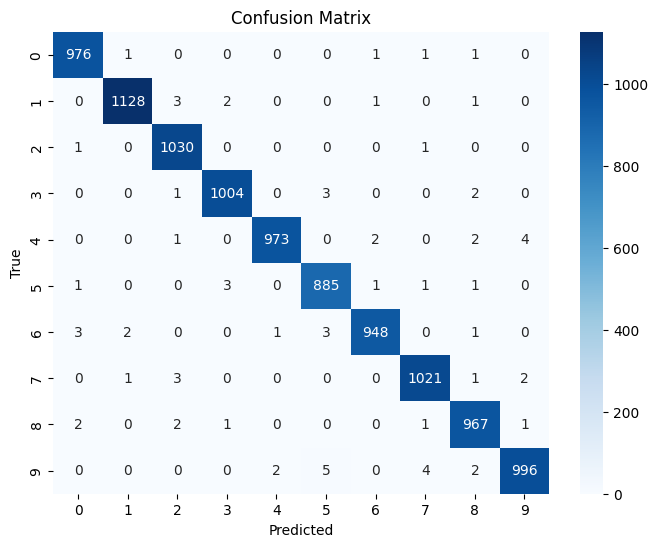

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



'\npredict returns probabilities for each of the 10 digit classes.\nWe take the argmax (highest probability) to pick the predicted digit.\nThe confusion matrix shows correct predictions on the main diagonal, errors off-diagonal.\nThe classification report shows precision, recall, and F1-score for each digit.\n'

In [33]:
# Predict class probabilities for test images
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

"""
predict returns probabilities for each of the 10 digit classes.
We take the argmax (highest probability) to pick the predicted digit.
The confusion matrix shows correct predictions on the main diagonal, errors off-diagonal.
The classification report shows precision, recall, and F1-score for each digit.
"""

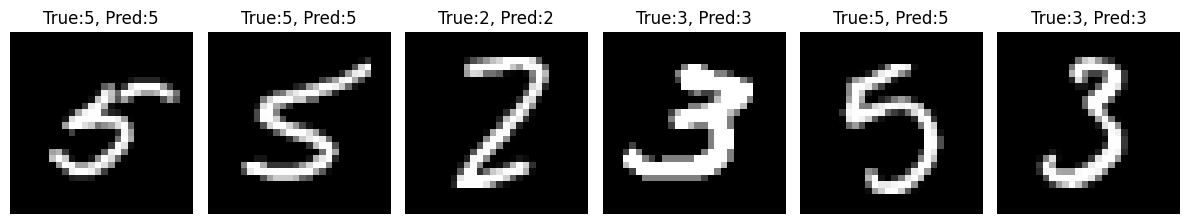

'\nPicks 6 random images from the test set.\nShows the true digit vs. the predicted digit.\nGood for a final sanity check.\n'

In [34]:
# Let's visualise a few random test images alongside predictions
indices = np.random.choice(len(X_test), 6, replace=False)

plt.figure(figsize=(12, 4))
for i, idx in enumerate(indices):
    img = X_test[idx].reshape(28, 28)  # convert back to 28x28 for display
    true_label = y_test[idx]
    pred_label = y_pred_classes[idx]

    plt.subplot(1, 6, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"True:{true_label}, Pred:{pred_label}")
    plt.axis("off")
plt.tight_layout()
plt.show()

"""
Picks 6 random images from the test set.
Shows the true digit vs. the predicted digit.
Good for a final sanity check.
"""

### Conclusions and Future Experiments

**Well done!** You've built a simple Convolutional Neural Network to classify MNIST digits.

Next ideas to try:
1. Increase or change layers (e.g., more conv layers, different filter sizes).
2. Change hyperparameters (learning rate, batch size, epochs).
3. Use data augmentation (although MNIST is already easy, it may add variety).
4. Try other optimisers (stochastic gradient descent, etc.).
5. Explore deeper networks or advanced architectures (e.g., adding more pooling layers).

Enjoy experimenting!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


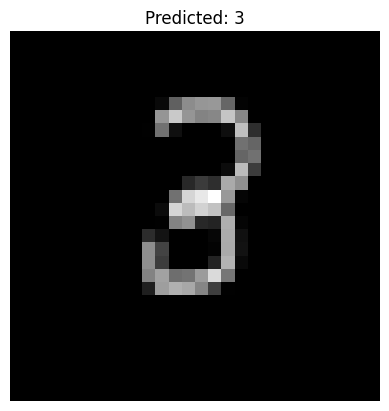

Probability of 0: 0.0000
Probability of 1: 0.0000
Probability of 2: 0.0016
Probability of 3: 0.9966
Probability of 4: 0.0000
Probability of 5: 0.0001
Probability of 6: 0.0000
Probability of 7: 0.0004
Probability of 8: 0.0000
Probability of 9: 0.0013


In [35]:
# Test the function
image_path = "test_3.png"
predicted_digit = predict_digit(image_path)